In [1]:
import torch
y = torch.Tensor([-0.7816, -0.6536,  0.2293,  0.2763,  0.5942,  0.6116,  0.7318,  0.7828])
# x = torch.arange(0, 8, 1)
x = torch.Tensor([ 15.1000, 115.1000, 215.1000, 315.1000, 415.1000, 575.2000, 675.2000,
        775.2000])
x

tensor([ 15.1000, 115.1000, 215.1000, 315.1000, 415.1000, 575.2000, 675.2000,
        775.2000])

In [2]:
A = torch.randn(1, requires_grad=True)
B = torch.randn(1, requires_grad=True)
t1 = torch.ones(1, requires_grad=True)

def model(x, A, B, t1):
    return A - B * torch.exp(- x / t1)

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

epoch 1, loss 0.310016
epoch 2, loss 0.282482
epoch 3, loss 0.260179
epoch 4, loss 0.242114
epoch 5, loss 0.227481
epoch 6, loss 0.215628
epoch 7, loss 0.206027
epoch 8, loss 0.198251
epoch 9, loss 0.191952
epoch 10, loss 0.186850
epoch 11, loss 0.182717
epoch 12, loss 0.179370
epoch 13, loss 0.176658
epoch 14, loss 0.174462
epoch 15, loss 0.172683
epoch 16, loss 0.171242
epoch 17, loss 0.170075
epoch 18, loss 0.169129
epoch 19, loss 0.168363
epoch 20, loss 0.167743
epoch 21, loss 0.167241
epoch 22, loss 0.166834
epoch 23, loss 0.166504
epoch 24, loss 0.166237
epoch 25, loss 0.166021
epoch 26, loss 0.165845
epoch 27, loss 0.165703
epoch 28, loss 0.165589
epoch 29, loss 0.165495
epoch 30, loss 0.165420
epoch 31, loss 0.165359
epoch 32, loss 0.165309
epoch 33, loss 0.165269
epoch 34, loss 0.165237
epoch 35, loss 0.165211
epoch 36, loss 0.165189
epoch 37, loss 0.165172
epoch 38, loss 0.165158
epoch 39, loss 0.165147
epoch 40, loss 0.165138
epoch 41, loss 0.165130
epoch 42, loss 0.165124
e

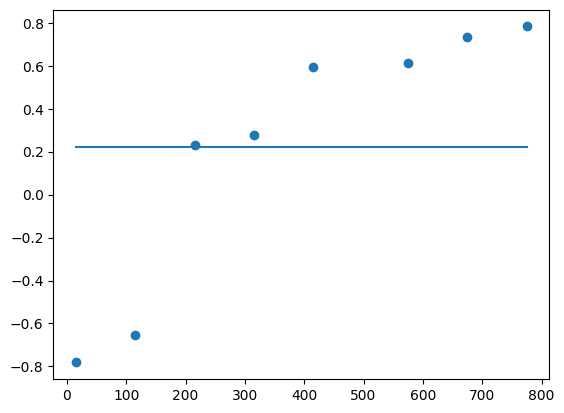

In [3]:
import matplotlib.pyplot as plt
lr = 0.1
num_epochs = 300
net = model
loss = squared_loss
for epoch in range(num_epochs):
    # for X, y in data_iter(batch_size, features, labels):
    l = loss(net(x, A, B, t1), y)  # X和y的小批量损失
    # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
    # 并以此计算关于[w,b]的梯度
    l.mean().backward()
    y_to_plot = net(x, A, B, t1)
     
    sgd([A, B, t1], lr, batch_size=1)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(x, A, B, t1), y)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
plt.plot(x,y_to_plot.detach().numpy())        # 画出当前 ax 列表和 ay 列表中的值的图形
plt.scatter(x, y)
plt.show()

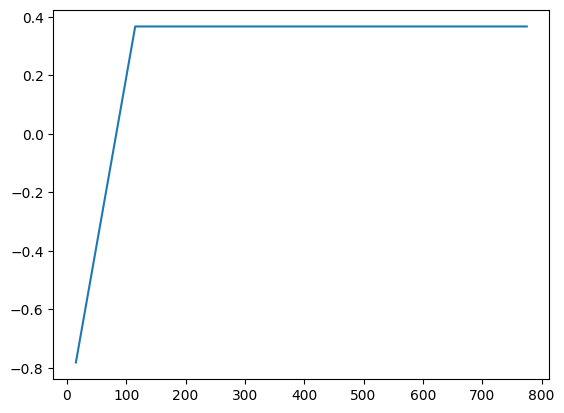

In [5]:
plt.plot(x, model(x, A=0.367489, B=7.717559, t1=7.928530))

In [6]:
model(x=torch.Tensor([215.1000, 315.1000, 415.1000, 575.2000, 675.2000]), A=0.367489, B=7.717559, t1=7.928530)

TypeError: bad operand type for unary -: 'list'

In [ ]:
torch.mean(a, dim=0).shape

In [5]:
import numpy as np
np.arccos((800 / 45 - 1) / (800 / 45 + 1)) * 180 / np.pi

26.684727594176476

In [2]:
import torch
mat = torch.randn(3,3,3)
print(mat)

tensor([[[ 2.1183,  0.1123,  0.8996],
         [-0.8584,  0.5891,  0.5237],
         [ 0.0870,  0.3018, -0.2717]],

        [[ 0.4697, -1.4929, -0.4827],
         [-1.2100,  0.2395,  1.3675],
         [-0.7157, -2.2865, -0.6358]],

        [[ 0.0226,  1.2690, -0.0514],
         [-0.7070, -0.9262, -0.6619],
         [ 0.3658,  0.1343,  0.5166]]])


In [4]:
torch.roll(mat, 1, 0)

tensor([[[ 0.0226,  1.2690, -0.0514],
         [-0.7070, -0.9262, -0.6619],
         [ 0.3658,  0.1343,  0.5166]],

        [[ 2.1183,  0.1123,  0.8996],
         [-0.8584,  0.5891,  0.5237],
         [ 0.0870,  0.3018, -0.2717]],

        [[ 0.4697, -1.4929, -0.4827],
         [-1.2100,  0.2395,  1.3675],
         [-0.7157, -2.2865, -0.6358]]])

In [13]:
import math
def zrot(phi):
    Rz = torch.Tensor(
        # [[math.cos(phi),-math.sin(phi),0],
        [[math.cos(phi),math.sin(phi),0],
        [-math.sin(phi),math.cos(phi),0],
        [0, 0, 1]]
        )
    return Rz

In [14]:
import math
# 这里 t 是一个数，不是矩阵
def res(t, T1, T2, df):
    # phi = 2*math.pi*df*t/1000
    phi = df*t*2*math.pi / 1000 
    E1 = math.exp(-t/T1)
    E2 = math.exp(-t/T2)
    z = zrot(phi)
    A = torch.Tensor([
        [E2,0,0],
        [0,E2,0],
        [0,0,E1]
    ]) @ z
    B = torch.Tensor([0,0,1-E1]).T
    return A, B

In [17]:
m0 = torch.Tensor([0, -1, 0]).T
A_2, B_2 = res(20, 1000, 45, 0)
A_4, B_4 = res(40, 1000, 45, 0)
print(m0 @ A_4.T + B_4)
print((m0 @ A_2.T + B_2) @ A_2.T + B_2)

tensor([ 0.0000, -0.4111,  0.0392])
tensor([ 0.0000, -0.4111,  0.0392])
